In [1]:
#For Data Analysis
import pandas as pd
import numpy as np

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#Preprocessing and scaling features
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler

#Split dataset into train and test and for Hyperparameter tuning
from sklearn.model_selection import train_test_split,GridSearchCV

#Models
#Logistic regression
from sklearn.linear_model import LogisticRegression

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Decission Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#SVM
from sklearn.svm import SVC

#Metrics to Evalute the model
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
#import the dataset
titanic_df=pd.read_csv("train.csv")

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def find_missing_values(df):
    for each in df.columns:
        print("The {} column has {}% of missing values".format(each,((df[each].isnull().sum()/df.shape[0])*100)))

In [6]:
numeric_data=titanic_df.select_dtypes(['int64','float64'])
categorical_data=titanic_df.select_dtypes(['object'])

In [7]:
find_missing_values(numeric_data)
find_missing_values(categorical_data)

The PassengerId column has 0.0% of missing values
The Survived column has 0.0% of missing values
The Pclass column has 0.0% of missing values
The Age column has 19.865319865319865% of missing values
The SibSp column has 0.0% of missing values
The Parch column has 0.0% of missing values
The Fare column has 0.0% of missing values
The Name column has 0.0% of missing values
The Sex column has 0.0% of missing values
The Ticket column has 0.0% of missing values
The Cabin column has 77.10437710437711% of missing values
The Embarked column has 0.22446689113355783% of missing values


In [ ]:
#There are some missing values in the Age column, Cabin, Embarked

In [ ]:
#Treating the missing values in AGe coloumn

In [8]:
titanic_df["Age"]=titanic_df["Age"].fillna(titanic_df["Age"].median())

In [ ]:
#Treating the missing values in Cabin & Embarked coloumn

In [9]:
titanic_df["Cabin"]=titanic_df["Cabin"].fillna(titanic_df["Cabin"].mode()[0])
titanic_df["Embarked"]=titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])

In [ ]:
#Now all the missing values are treated in training dataset.

In [ ]:
#The missing columns are treated in the Train data

 0   PassengerId  
 1   Pclass       
 2   Name         
 3   Sex          
 4   Age          
 5   SibSp        
 6   Parch        
 7   Ticket       
 8   Fare         
 9   Cabin        
 10  Embarked 
    Among the 11 columns what are the columns that have effect on the Survival.
    
No Use:      Passenger ID,Name,Ticket ID,Cabin will not have effect on the survival.
Categorical: Embarked
Binary:      Sex
Order:       Pclass 1>2>3
continuos:   Age, Fare
Count #No.:  SibSp,Parch

In [10]:
categorical_features=['Pclass','Sex','Embarked']

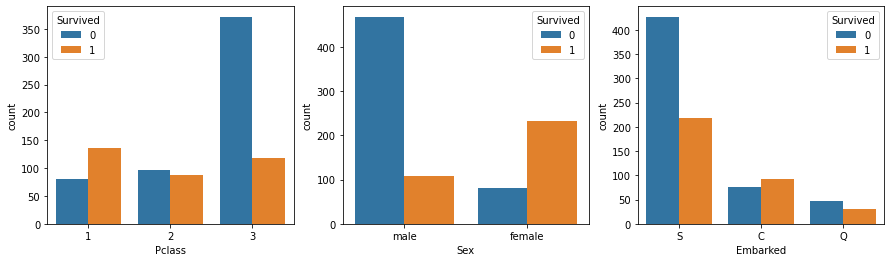

In [11]:
#Rows, columns, fignumber
a,b,c=1,3,0

fig=plt.figure(figsize=(15,4))
for i in range (0,len(categorical_features)):
    plt.subplot(a,b,c+1)
    sns.countplot(categorical_features[i],hue = "Survived",data=titanic_df)
    c+=1

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

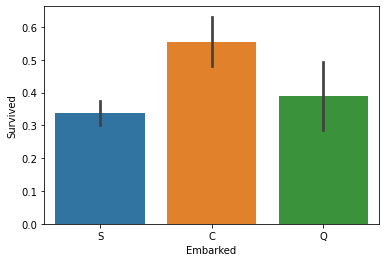

In [12]:
sns.barplot(x ='Embarked', y ='Survived',data = titanic_df)

#### The Pclass=1 has more survival rate
#### Females have more survival rate
#### The number of people embarked at the Southampton port surivived more
####  People emabrked at Cherbourg port the survival rate is more

In [13]:
port_survival = titanic_df[['Embarked', 'Survived']].groupby('Embarked').agg(['mean', 'count', 'sum'])
port_survival.columns = ['Survival rate', 'Total', 'Survived']
port_survival['Died'] = port_survival['Total'] - port_survival['Survived']

In [14]:
port_survival

,Survival rate,Total,Survived,Died
Embarked,,,,
C,0.553571,168,93,75
Q,0.389610,77,30,47
S,0.339009,646,219,427


From the plot and reports we can see that There are more number of people embarked at port "S" 
The survival rate is more at Port "C"

In [15]:
class_survival = titanic_df[['Pclass', 'Survived']].groupby('Pclass').agg(['mean', 'count', 'sum'])
class_survival.columns = ['Survival rate', 'Total', 'Survived']
class_survival['Died'] = class_survival['Total'] - class_survival['Survived']

In [16]:
class_survival

,Survival rate,Total,Survived,Died
Pclass,,,,
1,0.629630,216,136,80
2,0.472826,184,87,97
3,0.242363,491,119,372


From the plot and reports we can see that There are more number of people survived at class1>class2>class3
Many people belong to class 3 and the death rate is also more for them

In [17]:
sex_survival = titanic_df[['Sex', 'Survived']].groupby('Sex').agg(['mean', 'count', 'sum'])
sex_survival.columns = ['Survival rate', 'Total', 'Survived']
sex_survival['Died'] = sex_survival['Total'] - sex_survival['Survived']

In [18]:
sex_survival

,Survival rate,Total,Survived,Died
Sex,,,,
female,0.742038,314,233,81
male,0.188908,577,109,468


For females the survival rate is more.

In [19]:
numeric_features=['Age','SibSp','Parch','Fare']

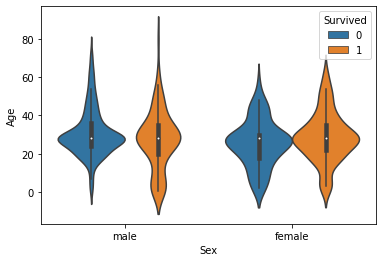

In [20]:
sns.violinplot(x =titanic_df["Sex"],y =titanic_df["Age"],hue=titanic_df["Survived"]);

#### From violin plots also we can infer that Females have survived more
and also the The males of lower age 0-20 have survived
in general the people in age group between 20 to 40 have survived more.

In [21]:
bin_labels= ['0-20', '20-40', '40-60', '60-80']
titanic_df['Age_bands'] = pd.cut(titanic_df['Age'], bins=4,right=True,labels=bin_labels)

<AxesSubplot:xlabel='Age_bands', ylabel='Survived'>

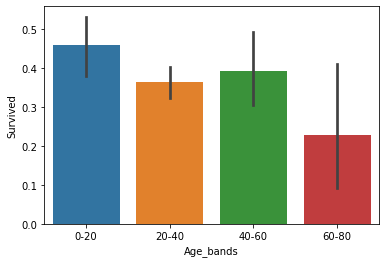

In [22]:
sns.barplot(x ='Age_bands', y ='Survived',data = titanic_df)

#### From the barplots we can infer , people in the Age band 0-20 have more chances to survive

0-20 > 40-60 > 20-40 > 60-80

In [23]:
titanic_df[['Age_bands', 'Survived']].groupby(['Age_bands'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_bands,Survived
0,0-20,0.458101
2,40-60,0.390625
1,20-40,0.364769
3,60-80,0.227273


<AxesSubplot:xlabel='Age_bands', ylabel='Survived'>

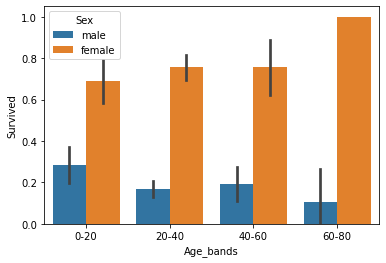

In [24]:
sns.barplot(x ='Age_bands', y ='Survived',hue='Sex',data = titanic_df)

In [25]:
titanic_df[['Age_bands','Sex', 'Survived']].groupby(['Age_bands','Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_bands,Sex,Survived
6,60-80,female,1.000000
2,20-40,female,0.756614
4,40-60,female,0.755556
0,0-20,female,0.688312
1,0-20,male,0.284314
5,40-60,male,0.192771
3,20-40,male,0.166220
7,60-80,male,0.105263


In [26]:
fare_labels= ['0-100', '100-200', '200-300', '300-400','400-500','500-600']
titanic_df['Fare_Ranges'] = pd.cut(titanic_df['Fare'], bins=6,right=True,labels=fare_labels)

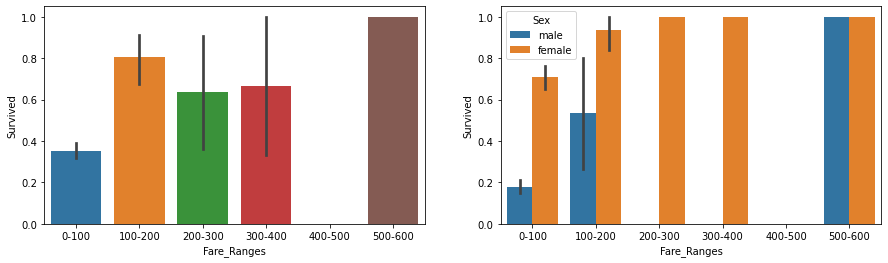

In [27]:
fig=plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x ='Fare_Ranges', y ='Survived',data = titanic_df)

plt.subplot(1,2,2)
sns.barplot(x ='Fare_Ranges', y ='Survived',hue='Sex',data = titanic_df)

plt.show()


In [28]:
titanic_df[['Fare_Ranges', 'Survived']].groupby(['Fare_Ranges'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare_Ranges,Survived
5,500-600,1.000000
1,100-200,0.804348
3,300-400,0.666667
2,200-300,0.636364
0,0-100,0.352727
4,400-500,NaN


In [29]:
titanic_df[['Fare_Ranges', 'Sex','Survived']].groupby(['Fare_Ranges','Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare_Ranges,Sex,Survived
4,200-300,female,1.000000
6,300-400,female,1.000000
10,500-600,female,1.000000
11,500-600,male,1.000000
2,100-200,female,0.935484
0,0-100,female,0.708487
3,100-200,male,0.533333
1,0-100,male,0.178700
5,200-300,male,0.000000
7,300-400,male,0.000000


In [30]:
titanic_df['FamSize'] = titanic_df["SibSp"] + titanic_df["Parch"] + 1

In [31]:
titanic_df[['FamSize','Survived']].groupby(['FamSize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamSize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


<AxesSubplot:xlabel='FamSize', ylabel='Survived'>

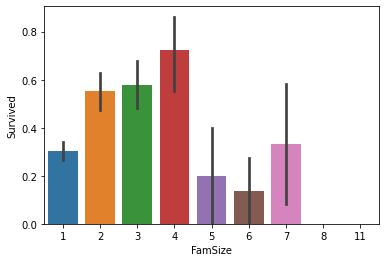

In [32]:
sns.barplot(x ='FamSize', y ='Survived',data = titanic_df)

In [33]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  Age_bands    891 non-null    category
 13  Fare_Ranges  891 non-null    category
 14  FamSize      891 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


In [34]:
X=titanic_df[['Pclass','Sex','Age','Fare','Embarked','Age_bands','Fare_Ranges','FamSize']]

In [35]:
Y=titanic_df['Survived']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    int64   
 1   Sex          891 non-null    object  
 2   Age          891 non-null    float64 
 3   Fare         891 non-null    float64 
 4   Embarked     891 non-null    object  
 5   Age_bands    891 non-null    category
 6   Fare_Ranges  891 non-null    category
 7   FamSize      891 non-null    int64   
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 44.0+ KB


In [ ]:
#Convert the categorical/object type features to numeric

    1.The Sex and Embarked features do not have order so we can use OHE
    2.For the Age bands and Fare_Range we can use label encoding

In [37]:
ohe=OneHotEncoder()

In [38]:
ohe_encoded=ohe.fit_transform(X[['Sex','Embarked']]).toarray()

In [39]:
ohe_df=pd.DataFrame(ohe_encoded,columns=['F', 'M', 'C','Q','S'])

In [40]:
X=pd.concat([X,ohe_df],axis=1)

In [41]:
X.drop(['Sex','Embarked'],axis=1,inplace=True)

In [42]:
le=LabelEncoder()

In [43]:
X['Age_bands']=le.fit_transform(X[['Age_bands']])
X['Fare_Ranges']=le.fit_transform(X[['Fare_Ranges']])

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Age_bands    891 non-null    int32  
 4   Fare_Ranges  891 non-null    int32  
 5   FamSize      891 non-null    int64  
 6   F            891 non-null    float64
 7   M            891 non-null    float64
 8   C            891 non-null    float64
 9   Q            891 non-null    float64
 10  S            891 non-null    float64
dtypes: float64(7), int32(2), int64(2)
memory usage: 69.7 KB


In [45]:
X.head()

,Pclass,Age,Fare,Age_bands,Fare_Ranges,FamSize,F,M,C,Q,S
0,3,22.0,7.2500,1,0,2,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,1,0,2,1.0,0.0,1.0,0.0,0.0
2,3,26.0,7.9250,1,0,1,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,1,0,2,1.0,0.0,0.0,0.0,1.0
4,3,35.0,8.0500,1,0,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
#All the columns are now converted to categorical

### The train and test data are ready with new features and all the missing values treated. 
### All columns are in numeric format

In [46]:
temp=pd.concat([X,Y],axis=1)

In [47]:
temp.rename(columns={"0": "Survived"})

,Pclass,Age,Fare,Age_bands,Fare_Ranges,FamSize,F,M,C,Q,S,Survived
0,3,22.0,7.2500,1,0,2,0.0,1.0,0.0,0.0,1.0,0
1,1,38.0,71.2833,1,0,2,1.0,0.0,1.0,0.0,0.0,1
2,3,26.0,7.9250,1,0,1,1.0,0.0,0.0,0.0,1.0,1
3,1,35.0,53.1000,1,0,2,1.0,0.0,0.0,0.0,1.0,1
4,3,35.0,8.0500,1,0,1,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,1,0,1,0.0,1.0,0.0,0.0,1.0,0
887,1,19.0,30.0000,0,0,1,1.0,0.0,0.0,0.0,1.0,1
888,3,28.0,23.4500,1,0,4,1.0,0.0,0.0,0.0,1.0,0
889,1,26.0,30.0000,1,0,1,0.0,1.0,1.0,0.0,0.0,1


In [48]:
correlation_matrix=temp.corr()

<AxesSubplot:>

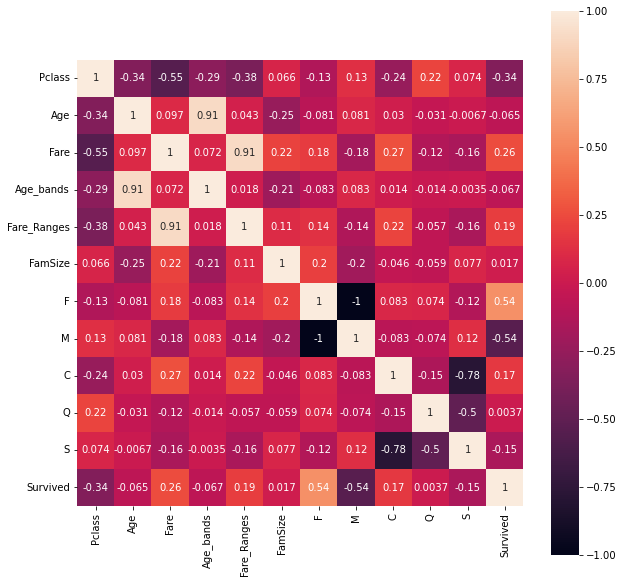

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,fmt='.2g',square=True)

Only Age /Age-bands ; Fare/ Fare-bands are correlated with each other.
The Male and Female are perfectly not correlated with each other.

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [51]:
X_new=X

In [52]:
#Scale the features for Logistic regression
minmax_scaler=MinMaxScaler()
X_new['Age']=minmax_scaler.fit_transform(X_new['Age'].values.reshape(-1,1))
X_new['Fare']=minmax_scaler.fit_transform(X_new['Fare'].values.reshape(-1,1))

In [53]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_new,Y,test_size=0.20,stratify=Y,random_state=42)

# 1.LOGISTIC REGRESSION

##### For logistic regression we shall use the X data which is feature scaled

In [54]:
lr=LogisticRegression(random_state=42)
lr.fit(X1_train,Y1_train)

LogisticRegression(random_state=42)

In [56]:
y_train_pred_lr=lr.predict(X1_train)
y_test_pred_lr=lr.predict(X1_test)

In [57]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y1_train,y_train_pred_lr),accuracy_score(Y1_test,y_test_pred_lr)))

Training Accuracy:0.8019662921348315, Testing Accuracy:0.8044692737430168


In [58]:
train_acc_lr=lr.score(X1_train,Y1_train)
test_acc_lr=lr.score(X1_test,Y1_test)

In [60]:
cm=confusion_matrix(Y1_test,y_test_pred)
labels=lr.classes_
labels

array([0, 1], dtype=int64)

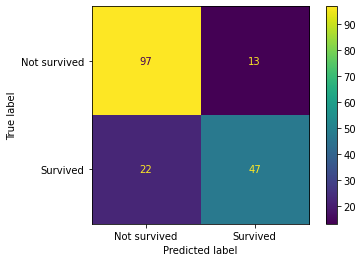

In [61]:
disp=ConfusionMatrixDisplay(cm,display_labels=['Not survived','Survived'])
disp.plot()
plt.show()

In [62]:
print("Classification report:{}".format(classification_report(Y1_test,y_test_pred)))

Classification report:              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### 1.1 Hyperparameter tuning for Logistic Regression

In [63]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','liblinear'],
    'max_iter' : [100, 200,300,400,500]
    }
]# As we have smaller dataset we choose the liblinear and lbfgs solver
# Max iter is from 100 to 500 for convergence-(choosing minima)

In [64]:
grid = GridSearchCV(lr, param_grid = param_grid, scoring='accuracy',cv = 5, verbose=True, n_jobs=-1)

    1)4 * 20 * 2 * 5 = 800
    2)1600 * 5 folds = 4000 fits

In [65]:
best_clf = grid.fit(X1_train,Y1_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [66]:
print(best_clf.best_estimator_)
print(best_clf.best_score_)

LogisticRegression(C=0.03359818286283781, random_state=42)
0.8034275583571358


In [67]:
df=pd.DataFrame(best_clf.cv_results_)
df=df.sort_values('rank_test_score')
df.to_csv("lr_cvresults.csv")

In [68]:
lr_gcv=best_clf.best_estimator_

In [69]:
y_train_pred_grid_lr=lr_gcv.predict(X1_train)
y_test_pred_grid_lr=lr_gcv.predict(X1_test)

In [70]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y1_train,y_train_pred_grid_lr),accuracy_score(Y1_test,y_test_pred_grid_lr)))

Training Accuracy:0.8146067415730337, Testing Accuracy:0.7821229050279329


In [73]:
train_acc_grid_lr=accuracy_score(Y1_train,y_train_pred_grid_lr)
test_acc_grid_lr=accuracy_score(Y1_test,y_test_pred_grid_lr)

In [ ]:
## The Logistic regression in ths section 1. gives good results

# 2.KNN or k-Nearest Neighbors

In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [76]:
train_accuracy = knn.score(X_train, Y_train) 
test_accuracy = knn.score(X_test, Y_test) 

In [77]:
print("Training Accuracy-KNN:{}".format(np.round(train_accuracy*100,2)))
print("Test Accuracy-KNN:{}".format(np.round(test_accuracy*100,2)))

Training Accuracy-KNN:80.9
Test Accuracy-KNN:68.16


We see that the test accuracy is drastically reduced. 
Try by normalising the data

   ### 2.1 KNN or k-Nearest Neighbors After MInMax Scaling 

In [81]:
knn.fit(X1_train, Y1_train)

KNeighborsClassifier()

In [82]:
y_train_pred_knn = knn.predict(X1_train)
y_test_pred_knn = knn.predict(X1_test)

In [83]:
train_acc_knn = knn.score(X1_train, Y1_train) 
test_acc_knn = knn.score(X1_test, Y1_test) 

In [84]:
print("Training Accuracy-KNN:{}".format(np.round(train_acc_knn*100,2)))
print("Test Accuracy-KNN:{}".format(np.round(test_acc_knn*100,2)))

Training Accuracy-KNN:84.97
Test Accuracy-KNN:77.09


In [ ]:
## We observed that the accuracy of the train and test data increased to 84% and 77%

### 2.2 KNN- with Hyperparameter Optimisation

In [86]:
knn2=KNeighborsClassifier()

In [85]:
hyperparameters_knn = {
    "n_neighbors" : range(1,20,2),
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2]
}
#neighbours should be 1,3,5,7etc odd values 
# we are using them from 1 to 19
# P=1 and p=2 we are checking for both manhattan and euclidean distance

    1.  10 * 2 * 2 = 40 values
    2.  40*5 = 200 fits

In [87]:
grid_cv_knn=GridSearchCV(knn2,hyperparameters_knn,cv=5,verbose=True, n_jobs=-1)

In [ ]:
#we shall use the X1 train and y1 train test as the have feature scaling applied

In [88]:
grid_cv_knn.fit(X1_train, Y1_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [89]:
print(grid_cv_knn.best_params_)
print(grid_cv_knn.best_estimator_)
print(grid_cv_knn.best_score_)

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=7, p=1)
0.8118191667487441


In [90]:
knn_2 = grid_cv_knn.best_estimator_

In [94]:
train_acc_grid_knn = knn_2.score(X1_train, Y1_train) 
test_acc_grid_knn = knn_2.score(X1_test, Y1_test) 

In [95]:
print("Training Accuracy-KNN:{}".format(np.round(train_acc_grid_knn*100,2)))
print("Test Accuracy-KNN:{}".format(np.round(test_acc_grid_knn*100,2)))

Training Accuracy-KNN:84.27
Test Accuracy-KNN:78.77


##### here we observed that the accuracy values after hyperparameter optimisation and the model      with just 5 nearest neighbours
##### gives the similar performance

### 3.Decission Tree

#### For the Decission trees we need not do feature scaling as it is a rule based algorithm
    1.no convergence(Gradient descent) takes place  
    2.no distance metric is involved like in KNN

In [96]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_train_pred_dt=dt.predict(X_train)
y_test_pred_dt=dt.predict(X_test)

In [98]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y_train,y_train_pred_dt),accuracy_score(Y_test,y_test_pred_dt)))

Training Accuracy:0.9817415730337079, Testing Accuracy:0.8156424581005587


In [100]:
train_acc_dt=dt.score(X_train,Y_train)
test_acc_dt=dt.score(X_test,Y_test)

### Training accuracy is far greater than test accuracy.

### 3.1 Check the accuracy with Hyperparameter tuning

In [103]:
dt_2=DecisionTreeClassifier(random_state=45)

In [102]:
hyperparameters_dt = {"criterion": ["entropy", "gini"],
                   "max_depth": [3, 5, 7, 10],
                   "max_features": ["log2", "sqrt", 'auto'], 
                   'min_samples_leaf' : [2, 3, 4, 5],
                   'min_samples_split' : [2, 3, 4, 5]
}

#  max_features
#  The number of features to consider when looking for the best split:
#         - If int, then consider `max_features` features at each split.
#         - If float, then `max_features` is a fraction and
#           `int(max_features * n_features)` features are considered at each
#           split.
#         - If "auto", then `max_features=sqrt(n_features)`.
#         - If "sqrt", then `max_features=sqrt(n_features)`.
#         - If "log2", then `max_features=log2(n_features)`.
#         - If None, then `max_features=n_features`.


In [104]:
grid_cv_dt=GridSearchCV(dt_2,hyperparameters_dt,cv=5,verbose=True, n_jobs=-1)

1. 2 * 4 * 3* 4 * 4 = 384 parameter combinations
2. 384 * 5 = 1920 fits

In [105]:
grid_cv_dt.fit(X_train,Y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=True)

In [106]:
print(grid_cv_dt.best_estimator_)
print(grid_cv_dt.best_params_)
print(grid_cv_dt.best_score_)

DecisionTreeClassifier(max_depth=7, max_features='log2', min_samples_leaf=5,
                       random_state=45)
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8188220230473752


In [107]:
dt_grid=grid_cv_dt.best_estimator_
dt_grid.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7, max_features='log2', min_samples_leaf=5,
                       random_state=45)

In [108]:
y_train_pred_dt2=dt_grid.predict(X_train)
y_test_pred_dt2=dt_grid.predict(X_test)

In [109]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y_train,y_train_pred_dt2),accuracy_score(Y_test,y_test_pred_dt2)))

Training Accuracy:0.8567415730337079, Testing Accuracy:0.7597765363128491


In [110]:
train_acc_grid_dt=dt_grid.score(X_train,Y_train)
test_acc_grid_dt=dt_grid.score(X_test,Y_test)

### 3.2 Check the accuracy with Cost complexity pruning

In [112]:
path=dt.cost_complexity_pruning_path(X_train,Y_train)
#Path is a dict containg differents values of CCP_alphas and corrsponding impurites
#(Sum of the impurities of the subtree leaves for the corresponding alpha value in ``ccp_alphas``.) in an array

In [113]:
path

{'ccp_alphas': array([0.00000000e+00, 5.85205993e-05, 9.29444812e-05, 9.36329588e-05,
        1.11467808e-04, 2.34082397e-04, 2.80898876e-04, 3.40483487e-04,
        3.74531835e-04, 5.99766142e-04, 6.24219725e-04, 6.28326434e-04,
        6.55430712e-04, 6.55430712e-04, 6.93577473e-04, 8.51208716e-04,
        8.51208716e-04, 9.25048509e-04, 9.36329588e-04, 9.36329588e-04,
        9.36329588e-04, 1.12359551e-03, 1.12359551e-03, 1.20385233e-03,
        1.20385233e-03, 1.20621282e-03, 1.22893258e-03, 1.24843945e-03,
        1.26404494e-03, 1.28049398e-03, 1.31397603e-03, 1.37023842e-03,
        1.47480485e-03, 1.60513644e-03, 1.68461317e-03, 1.72050562e-03,
        1.80577849e-03, 1.83715006e-03, 1.87265918e-03, 1.92616372e-03,
        2.05506104e-03, 2.13481281e-03, 2.24719101e-03, 2.24719101e-03,
        2.24719101e-03, 2.34082397e-03, 2.42594484e-03, 2.43202490e-03,
        2.64847512e-03, 2.66939053e-03, 2.99625468e-03, 3.00037042e-03,
        3.53130016e-03, 3.85962352e-03, 4.36265228

In [114]:
alphas=path['ccp_alphas']
alphas.min(),alphas.max()

(0.0, 0.14259770698334534)

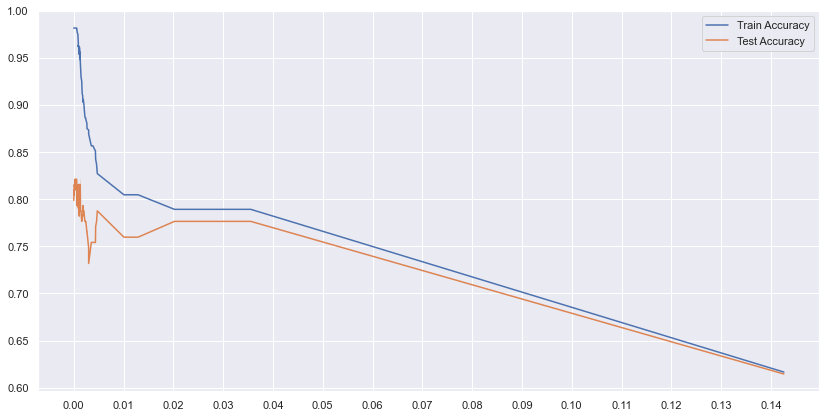

In [115]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,Y_train)
    y_train_pred_CCP=tree.predict(X_train)
    y_test_pred_CCP=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(Y_train,y_train_pred_CCP))
    accuracy_test.append(accuracy_score(Y_test,y_test_pred_CCP))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.15,0.01))
plt.show()

In [ ]:
#at ALPHA=0.02 TO 0.035 THE train and test accuracy are same 

In [116]:
tree_new = DecisionTreeClassifier(ccp_alpha=0.03,random_state=40)
tree_new.fit(X_train,Y_train)
y_train_pred_ccp=tree_new.predict(X_train)
y_test_pred_ccp=tree_new.predict(X_test)

print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y1_train,y_train_pred_ccp),accuracy_score(Y1_test,y_test_pred_ccp)))

Training Accuracy:0.7893258426966292, Testing Accuracy:0.776536312849162


In [117]:
train_acc_ccp_dt=tree_new.score(X_train,Y_train)
test_acc_ccp_dt=tree_new.score(X_test,Y_test)

### 4. Random Forest

In [119]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(X_train, Y_train)
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.17

In [120]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y_train,y_train_pred_rf),accuracy_score(Y_test,y_test_pred_rf)))

Training Accuracy:0.9817415730337079, Testing Accuracy:0.8156424581005587


In [121]:
train_acc_rf=random_forest.score(X_train, Y_train)
test_acc_rf=random_forest.score(X_test, Y_test)

### 4.1 Random Forest Hyper Paramter tuning

In [124]:
random_forest1=RandomForestClassifier()

In [123]:
hyperparameters_rf = {"criterion": ["entropy", "gini"],
                   "max_depth": [3, 5, 7],
                   "max_features": ["log2", "sqrt", 'auto'], 
                   'min_samples_leaf' : [2, 3, 4, 5],
                   'min_samples_split' : [2, 3, 4, 5],
                    "n_estimators" :[50,100,150,200,250] # number of trees in the random forest
}


In [125]:
grid_cv_rf= GridSearchCV(random_forest1,hyperparameters_rf,cv=5,n_jobs=-1,verbose=4)


In [126]:
grid_cv_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=4)

In [127]:
print(grid_cv_rf.best_estimator_)
print(grid_cv_rf.best_params_)
print(grid_cv_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150)
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
0.827331823106471


In [129]:
rf_df=pd.DataFrame(grid_cv_rf.cv_results_)
rf_df=rf_df.sort_values('rank_test_score')
rf_df.to_csv("rf_.csv")

In [130]:
random_forest2=grid_cv_rf.best_estimator_

In [131]:
random_forest2.fit(X_train,Y_train)
y_train_pred_rf2 = random_forest2.predict(X_train)
y_test_pred_rf2 = random_forest2.predict(X_test)

In [132]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y_train,y_train_pred_rf2),accuracy_score(Y_test,y_test_pred_rf2)))

Training Accuracy:0.851123595505618, Testing Accuracy:0.8379888268156425


In [134]:
train_acc_grid_rf=random_forest2.score(X_train,Y_train)
test_acc_grid_rf=random_forest2.score(X_test,Y_test)


### 5.SVC

In [140]:
svc = SVC(random_state=30)
svc.fit(X_train, Y_train)
Y_train_pred_svc = svc.predict(X_train)
Y_test_pred_svc = svc.predict(X_test)

In [141]:
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y_train,Y_train_pred_svc),accuracy_score(Y_test,Y_test_pred_svc)))

Training Accuracy:0.699438202247191, Testing Accuracy:0.6201117318435754


In [142]:
train_acc_svc=svc.score(X_train, Y_train)
test_acc_svc=svc.score(X_test,Y_test)

### 5.1 SVC Hyperparameter tuning

In [143]:
svc1 = SVC(random_state=40)

In [144]:
hyperparameters_svc = {
              'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
               } 
  
grid_svm = GridSearchCV(svc1, hyperparameters_svc, refit = True, verbose = 4)

In [145]:
# fitting the model for grid search
grid_svm.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.664 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.725 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(random_state=40),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [146]:
print(grid_svm.best_estimator_)
print(grid_svm.best_params_)
print(grid_svm.best_score_)

SVC(C=100, gamma=0.001, random_state=40)
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.8034374076627598


In [147]:
svc2=grid_svm.best_estimator_

In [148]:
svc2.fit(X_train,Y_train)

SVC(C=100, gamma=0.001, random_state=40)

In [149]:
Y_train_pred_svc2 = svc2.predict(X_train)
Y_test_pred_svc2 = svc2.predict(X_test)
print("Training Accuracy:{}, Testing Accuracy:{}".format(accuracy_score(Y_train,Y_train_pred_svc2),accuracy_score(Y_test,Y_test_pred_svc2)))

Training Accuracy:0.8370786516853933, Testing Accuracy:0.7877094972067039


In [150]:
train_acc_grid_svc=svc2.score(X_train,Y_train)
test_acc_grid_svc=svc2.score(X_test,Y_test)

In [152]:
summary_models_dict = {
        
    'Model': ['Logistic Regression',
              'Logistic Regression-Hyperparamters', 
              'KNN',
              'KNN-Hyperparamters',
              'Decision Tree',
              'Decision Tree-Hyperparameters',
              'Decision Tree-CCP',
              'Random Forest',
              'Random Forest-Hyperparamters',
              'SVC',
              'SVC-Hyperparameters'],
    
    'Training_Accuracy': [train_acc_lr, 
                          train_acc_grid_lr,
                          train_acc_knn,
                          train_acc_grid_knn, 
                          train_acc_dt,
                          train_acc_grid_dt,
                          train_acc_ccp_dt,
                          train_acc_rf,
                          train_acc_grid_rf,
                          train_acc_svc,
                          train_acc_grid_svc],
   
    'Testing_Accuracy': [test_acc_lr,
                         test_acc_grid_lr,
                         test_acc_knn,
                         test_acc_grid_knn,
                         test_acc_dt,
                         test_acc_grid_dt,
                         test_acc_ccp_dt,
                         test_acc_rf,
                         test_acc_grid_rf,
                         test_acc_svc,
                         test_acc_grid_svc]

    }



In [153]:
summary_models_df=pd.DataFrame(data=summary_models_dict)

In [155]:
summary_models_df.sort_values(by='Testing_Accuracy', ascending=False)

,Model,Training_Accuracy,Testing_Accuracy
8,Random Forest-Hyperparamters,0.851124,0.837989
4,Decision Tree,0.981742,0.815642
7,Random Forest,0.981742,0.815642
0,Logistic Regression,0.801966,0.804469
3,KNN-Hyperparamters,0.842697,0.787709
10,SVC-Hyperparameters,0.837079,0.787709
1,Logistic Regression-Hyperparamters,0.814607,0.782123
6,Decision Tree-CCP,0.789326,0.776536
2,KNN,0.849719,0.770950
5,Decision Tree-Hyperparameters,0.856742,0.759777


# Conclusion: 
After examining the performance of various classifiers on the data
Random forest model gives best Accuracy of ~84%

In [ ]:
# We have to also convert the test data to the same format
test_df=pd.read_csv("test.csv")
test_df.info()
find_missing_values(test_df)

test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Cabin']=test_df['Cabin'].fillna(test_df['Cabin'].mode()[0])

find_missing_values(test_df)

bin_labels= ['0-20', '20-40', '40-60', '60-80']
test_df['Age_bands'] = pd.cut(test_df['Age'], bins=4,right=True,labels=bin_labels)

fare_labels= ['0-100', '100-200', '200-300', '300-400','400-500','500-600']
test_df['Fare_Ranges'] = pd.cut(test_df['Fare'], bins=6,right=True,labels=fare_labels)

test_df['FamSize'] = test_df["SibSp"] + test_df["Parch"] + 1

test_ohe=ohe.fit_transform(test_df[['Sex','Embarked']]).toarray()

test_ohe_df=pd.DataFrame(test_ohe,columns=['F', 'M', 'C','Q','S'])

test_df=pd.concat([test_df,test_ohe_df],axis=1)

test_df['Age_bands']=le.fit_transform(test_df[['Age_bands']])
test_df['Fare_Ranges']=le.fit_transform(test_df[['Fare_Ranges']])

test_df.info()

test_df = test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Sex','Embarked'], axis=1)
test_df.info()